<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/4.%20Week%204/Compass_Scores_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Dataset

In [32]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix
)

# 1. Load Dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/compas-scores-two-years.csv"
df = pd.read_csv(url)


# 2. EDA dan Feature Engineering

In [33]:
# Filter kolom yang relevan
cols_to_keep = [
    'age', 'race', 'sex', 'priors_count',
    'c_charge_degree', 'two_year_recid'
]
df = df[cols_to_keep]

# Handle missing values
df = df.dropna()

# 3. Data Visualization

Exploratory Data Analysis

5 data pertama:
   age              race   sex  priors_count c_charge_degree  two_year_recid
0   69             Other  Male             0               F               0
1   34  African-American  Male             0               F               1
2   24  African-American  Male             4               F               1
3   23  African-American  Male             1               F               0
4   43             Other  Male             2               F               0

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              7214 non-null   int64 
 1   race             7214 non-null   object
 2   sex              7214 non-null   object
 3   priors_count     7214 non-null   int64 
 4   c_charge_degree  7214 non-null   object
 5   two_year_recid   7214 non-null   int64 
dtypes: i

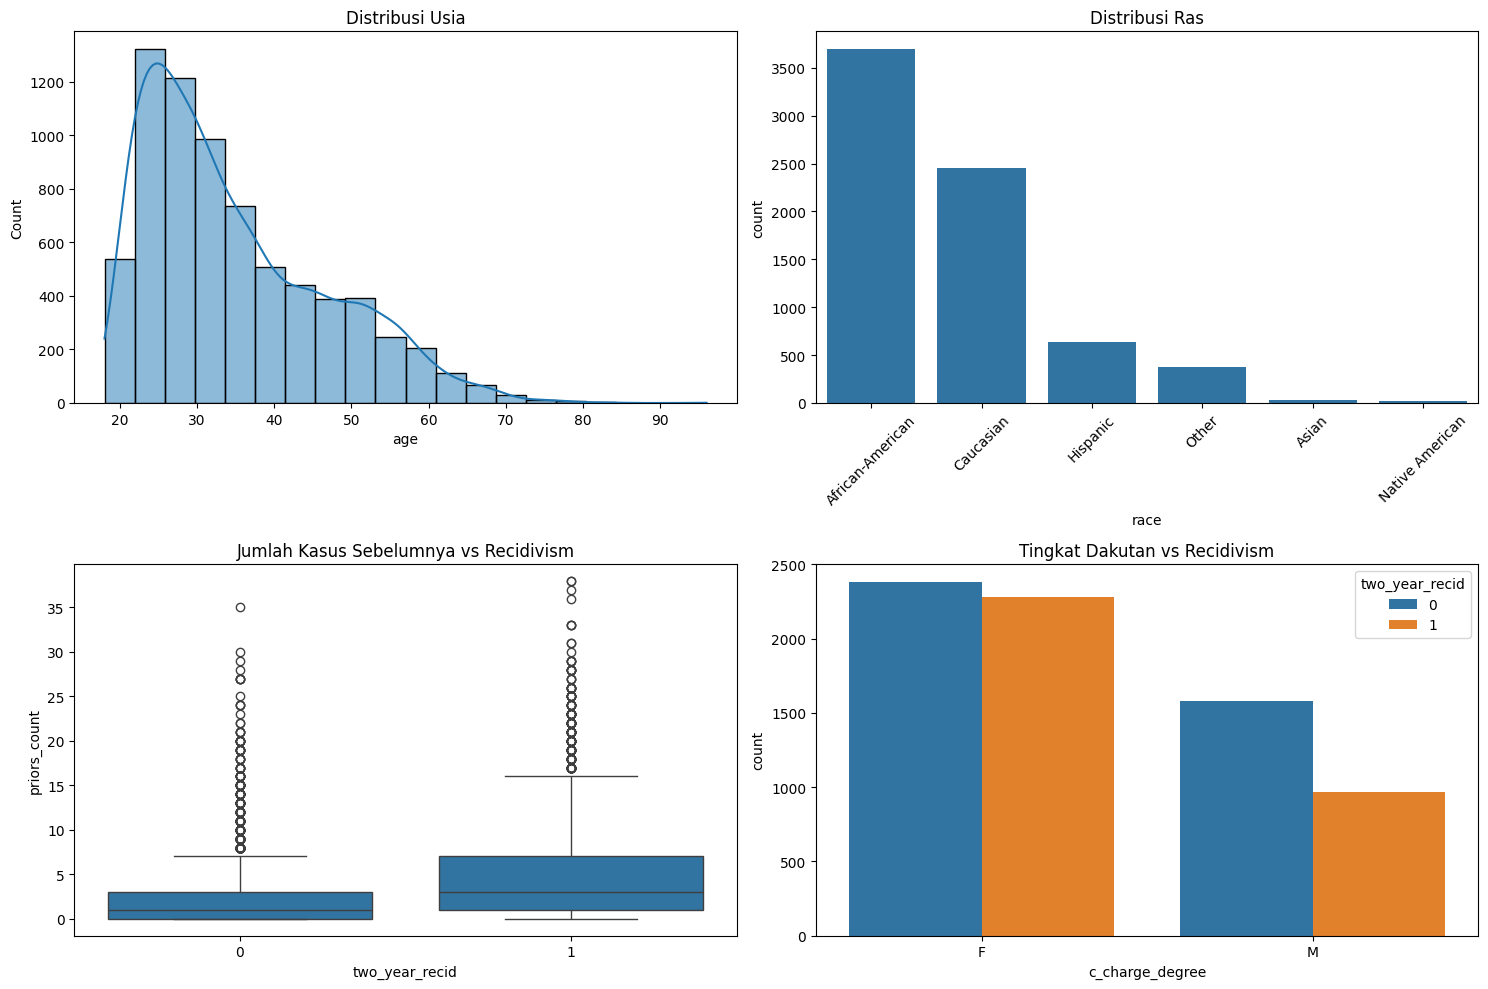

In [36]:
print("="*50)
print("Exploratory Data Analysis")
print("="*50)
print("\n5 data pertama:")
print(df.head())
print("\nInformasi dataset:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe(include='all'))

plt.figure(figsize=(15,10))

# Distribusi Umur
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribusi Usia')

# Jumlah Kasus Berdasarkan Ras
plt.subplot(2, 2, 2)
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title('Distribusi Ras')
plt.xticks(rotation=45)

# Hubungan Prior Count dengan Recidivism
plt.subplot(2, 2, 3)
sns.boxplot(x='two_year_recid', y='priors_count', data=df)
plt.title('Jumlah Kasus Sebelumnya vs Recidivism')

# Distribusi Charge Degree
plt.subplot(2, 2, 4)
sns.countplot(x='c_charge_degree', hue='two_year_recid', data=df)
plt.title('Tingkat Dakutan vs Recidivism')

plt.tight_layout()
plt.show()

# 4. Feature Engineering

In [37]:
# Split data
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Pipeline preprocessing
numeric_features = ['age', 'priors_count']
categorical_features = ['race', 'sex', 'c_charge_degree']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])


# 5. Model Training

In [38]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'priors_count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['race', 'sex',
                                                   'c_charge_degree'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

# 5. Evaluasi Model


Evaluasi Model

Training Metrics:
Akurasi   : 0.6619
Presisi   : 0.6146
Recall    : 0.6695
F1-Score  : 0.6409
AUC-ROC   : 0.7246


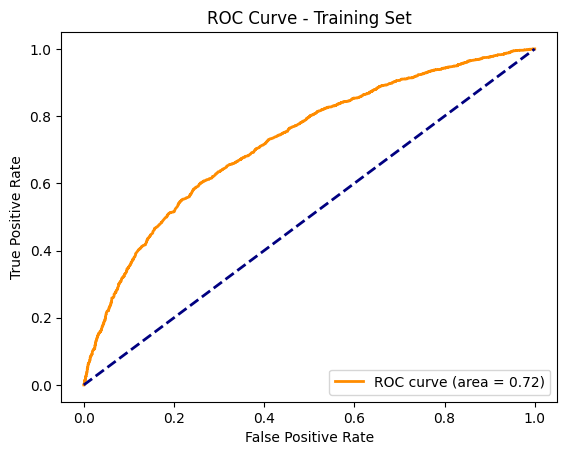

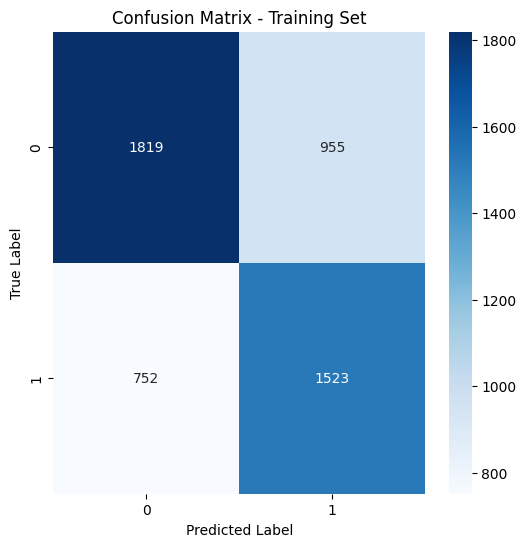


Test Metrics:
Akurasi   : 0.6568
Presisi   : 0.6115
Recall    : 0.6547
F1-Score  : 0.6324
AUC-ROC   : 0.7162


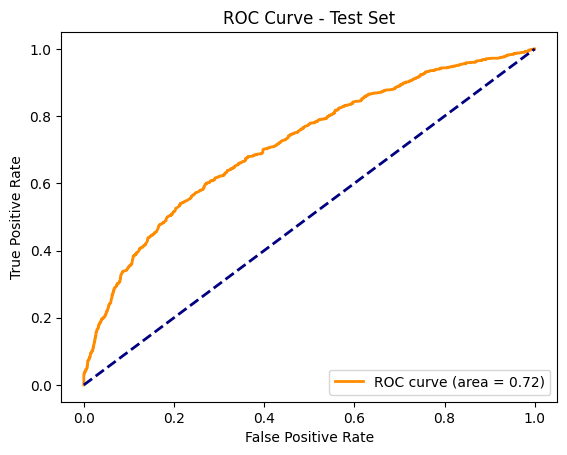

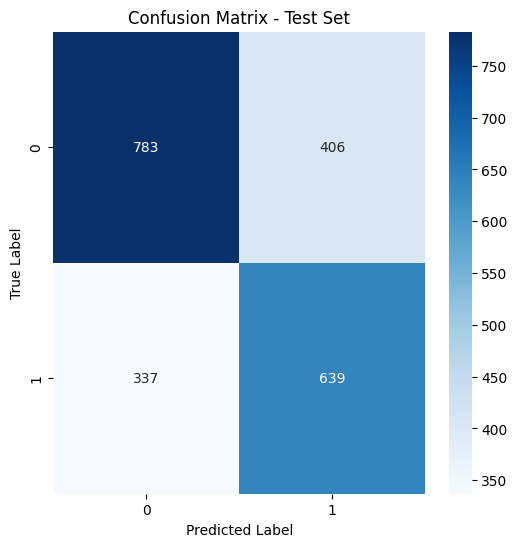

In [39]:
def evaluate_model(model, X, y, set_name='Test'):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)

    # Hitung metrik
    acc = accuracy_score(y, y_pred)
    pre = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_proba[:,1])

    print(f"\n{set_name} Metrics:")
    print(f"Akurasi   : {acc:.4f}")
    print(f"Presisi   : {pre:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"AUC-ROC   : {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y, y_proba[:,1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {set_name} Set')
    plt.legend(loc="lower right")
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {set_name} Set')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return acc, pre, rec, f1, roc_auc

# Evaluasi data training dan test
print("\n" + "="*50)
print("Evaluasi Model")
print("="*50)
train_metrics = evaluate_model(clf, X_train, y_train, 'Training')
test_metrics = evaluate_model(clf, X_test, y_test, 'Test')

## **1. Akurasi (Accuracy)**
Mengukur proporsi prediksi benar dari seluruh prediksi:
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

## **2. Presisi (Precision)**
Mengukur akurasi prediksi positif:
$$ \text{Precision} = \frac{TP}{TP + FP} $$

## **3. Recall (Sensitivity)**
Mengukur kemampuan menemukan kasus positif:
$$ \text{Recall} = \frac{TP}{TP + FN} $$

## **4. F1-Score**
Rata-rata harmonik presisi dan recall:
$$ F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

## **5. AUC-ROC**
Luas di bawah kurva ROC:
$$ \text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}^{-1}(x)) dx $$

Dimana:
- $\text{TPR} = \frac{TP}{TP + FN}$ (True Positive Rate/Recall)
- $\text{FPR} = \frac{FP}{FP + TN}$ (False Positive Rate)